# set-up the enviroment

download the dataset

In [ ]:
!gdown 1jH6nYkkcpwSyELOe-U3JgOOdA4mGHiJx

Downloading...
From: https://drive.google.com/uc?id=1jH6nYkkcpwSyELOe-U3JgOOdA4mGHiJx
To: /content/data.csv
100% 8.31M/8.31M [00:00<00:00, 62.5MB/s]


set seed for reproducibility


In [ ]:
import random
import numpy as np
import tensorflow as tf

random.seed(1)

np.random.seed(1)

tf.random.set_seed(1)

read the csv

In [ ]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

# data exploration

display the first few rows of the dataset

In [ ]:
print(df.head())

basic statistics of numerical columns

In [ ]:
print(df.describe())

info about the dataset, including data types and missing values

In [ ]:
df.info()

explore categorical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# omit OCCUPATION_TYPE because the charts gets messy
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']


for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=col, data=df, hue='status', palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



```
`# This is formatted as code`
```

it can be easily seen that class "0" is the predominant one. An address of unbalanced classes

explore numerical columns

In [ ]:
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(18, 5))
fig.suptitle('Distribution of Numerical Columns')

for i, col in enumerate(numerical_cols):
    # Plot histograms for numerical columns
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

In [ ]:
# Correlation heatmap for numerical columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
# Countplot for the target variable "status"
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribution of Target Variable (status)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

As mentioned before, we have a strong imbalance of classes

# preprocessing

replace the NAs from *OCCUPATION_TYPE* column and drop *ID* column

In [ ]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('jobless')

df = df.drop('ID', axis=1)

make all labels to predict, numeric

In [ ]:
status_replacement = {'X': 7, 'C': 6}
df['status'] = df['status'].replace(status_replacement).astype(int)

one encode categorical columns

In [ ]:
columns_to_one_encode = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=columns_to_one_encode)

create new features (optional)

In [ ]:
# division by zero is not handle because there is always at least 1 member in a family
#df['income_per_family'] = df['AMT_INCOME_TOTAL']/df['CNT_FAM_MEMBERS']

#df['total_balance_children'] = df['income_per_family'] * (1+(df['CNT_CHILDREN']))

divide the dataset into training/testing

In [ ]:
from sklearn.model_selection import train_test_split

y = df['status'].to_numpy()
x = df.loc[:, df.columns != 'status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

standardize numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

scaler = StandardScaler()

x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])

x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])



# oversampling

In [ ]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# Find unique values and their counts
unique_labels, counts = np.unique(y_train, return_counts=True)

# Sort the labels based on their counts
sorted_indices = np.argsort(-counts)  # Sort in descending order
sorted_labels = unique_labels[sorted_indices]
sorted_counts = counts[sorted_indices]

# Undersample the majority class to the second majority class
#undersampler = RandomUnderSampler(sampling_strategy={sorted_labels[0]:sorted_counts[1]}, random_state=42)
#x_train, y_train = undersampler.fit_resample(x_train, y_train)

# Oversample
smote = SMOTE(sampling_strategy={sorted_labels[4]:sorted_counts[3],sorted_labels[5]:sorted_counts[3],sorted_labels[6]:sorted_counts[3],sorted_labels[7]:sorted_counts[3]},random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print the occurrences for each class

In [ ]:
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} occurrences")

0: 41752 occurrences
1: 5141 occurrences
2: 1457 occurrences
3: 1457 occurrences
4: 1457 occurrences
5: 1457 occurrences
6: 1457 occurrences
7: 4629 occurrences


let's see the percentage of each class in the test dataset






In [ ]:
import numpy as np

# Get unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# Calculate the percentage of each class
total_instances = len(y_train)
percentage_per_class = counts / total_instances * 100

# Display the results
for value, count, percentage in zip(unique_values, counts, percentage_per_class):
    print(f"Class {value}: Count = {count}, Percentage = {percentage:.2f}%")


Class 0: Count = 41752, Percentage = 71.00%
Class 1: Count = 5141, Percentage = 8.74%
Class 2: Count = 1457, Percentage = 2.48%
Class 3: Count = 1457, Percentage = 2.48%
Class 4: Count = 1457, Percentage = 2.48%
Class 5: Count = 1457, Percentage = 2.48%
Class 6: Count = 1457, Percentage = 2.48%
Class 7: Count = 4629, Percentage = 7.87%


# cross-validation

In [ ]:
!pip install scikeras
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping


# Define the function to create the model
def create_model(dropout):
    model = Sequential()
    model.add(Dense(units=256, activation='relu', input_dim=x_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=8, activation='softmax'))
    model.compile(optimizer=Adam(amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with GridSearchCV
model = KerasClassifier(model=create_model, epochs=1000, verbose=4)

# Define the parameter grid
param_grid = {
    'batch_size': [512,1024,2048],
    'model__dropout': [0.1, 0.2, 0.3]
}

# Use StratifiedKFold for cross-validation if dealing with imbalanced classes
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv,verbose = 4)

# Perform the grid search on the data
grid.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=  11.2s
[CV 2/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=   8.6s
[CV 3/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=   9.4s
[CV 4/10] END batch_size=512, model__dropout=0.1;, score=0.709 total time=   8.9s
[CV 5/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=   6.2s
[CV 6/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=   7.6s
[CV 7/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=   8.7s
[CV 8/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=  10.1s
[CV 9/10] END batch_size=512, model__dropout=0.1;, score=0.710 total time=   9.6s
[CV 10/10] END batch_size=512, model__dropout=0.1;, score=0.701 total time=   7.2s
[CV 1/10] END batch_size=512, model__dropout=0.2;, score=0.709 total time=   6.2s
[CV 2/10] END batch_size=512, model_

[CV 4/10] END batch_size=2048, model__dropout=0.1;, score=0.710 total time=   6.8s


[CV 5/10] END batch_size=2048, model__dropout=0.1;, score=0.405 total time=   5.4s
[CV 6/10] END batch_size=2048, model__dropout=0.1;, score=0.709 total time=   7.4s
[CV 7/10] END batch_size=2048, model__dropout=0.1;, score=0.220 total time=   5.5s
[CV 8/10] END batch_size=2048, model__dropout=0.1;, score=0.663 total time=   6.4s
[CV 9/10] END batch_size=2048, model__dropout=0.1;, score=0.709 total time=   5.9s
[CV 10/10] END batch_size=2048, model__dropout=0.1;, score=0.669 total time=   6.5s
[CV 1/10] END batch_size=2048, model__dropout=0.2;, score=0.710 total time=   7.7s
[CV 2/10] END batch_size=2048, model__dropout=0.2;, score=0.709 total time=   6.3s
[CV 3/10] END batch_size=2048, model__dropout=0.2;, score=0.709 total time=   6.0s
[CV 4/10] END batch_size=2048, model__dropout=0.2;, score=0.027 total time=   6.3s
[CV 5/10] END batch_size=2048, model__dropout=0.2;, score=0.709 total time=  13.6s
[CV 6/10] END batch_size=2048, model__dropout=0.2;, score=0.707 total time=   5.4s
[CV

In [ ]:
print(x_train.shape[1])

55


# training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# dropout=best_params['model__dropout']
# best_params['batch_size']
def create_model(dropout):
    model = Sequential()
    model.add(Dense(units=256, activation='relu', input_dim=x_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(units=8, activation='softmax'))
    model.compile(optimizer=Adam(amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# create the model
final_model = create_model(0.2)

# Further split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# Define a callback to save the best weights during training
checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = final_model.fit(x_train, y_train, epochs=15000, batch_size=512,validation_data=(x_val, y_val), callbacks=[checkpoint])

# Load the best weights after training
final_model.load_weights('best_weights.h5')


Epoch 1/15000
90/92 [============================>.] - ETA: 0s - loss: 2.1688 - accuracy: 0.2939
Epoch 1: val_accuracy improved from -inf to 0.71433, saving model to best_weights.h5
92/92 [==============================] - 7s 17ms/step - loss: 2.1628 - accuracy: 0.2976 - val_loss: 1.6065 - val_accuracy: 0.7143
Epoch 2/15000
 5/92 [>.............................] - ETA: 1s - loss: 1.8336 - accuracy: 0.4949

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
92/92 [==============================] - 1s 16ms/step - loss: 0.2933 - accuracy: 0.8992 - val_loss: 0.4955 - val_accuracy: 0.8612
Epoch 4665/15000
91/92 [============================>.] - ETA: 0s - loss: 0.2892 - accuracy: 0.9008
Epoch 4665: val_accuracy did not improve from 0.86405
92/92 [==============================] - 2s 16ms/step - loss: 0.2892 - accuracy: 0.9006 - val_loss: 0.4988 - val_accuracy: 0.8604
Epoch 4666/15000
91/92 [============================>.] - ETA: 0s - loss: 0.2949 - accuracy: 0.8984
Epoch 4666: val_accuracy did not improve from 0.86405
92/92 [==============================] - 2s 17ms/step - loss: 0.2940 - accuracy: 0.8987 - val_loss: 0.4989 - val_accuracy: 0.8609
Epoch 4667/15000
89/92 [============================>.] - ETA: 0s - loss: 0.2861 - accuracy: 0.9031
Epoch 4667: val_accuracy did not improve from 0.86405
92/92 [==============================] - 2s 16ms/step - loss: 0.2870 - accuracy: 0.9027 - val_los

# evaluate results

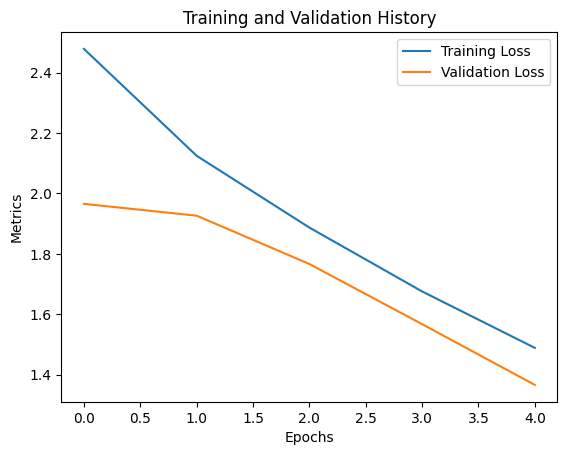

423/423 [==============================] - 1s 3ms/step - loss: 1.2941 - accuracy: 0.7677
Test Accuracy: 76.77%
Test Loss: 1.2941
423/423 [==============================] - 1s 2ms/step
Metrics Table:
      Metric     Value
0   Accuracy  0.767655
1  Precision  0.589294
2     Recall  0.767655
3   F1-Score  0.666753


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


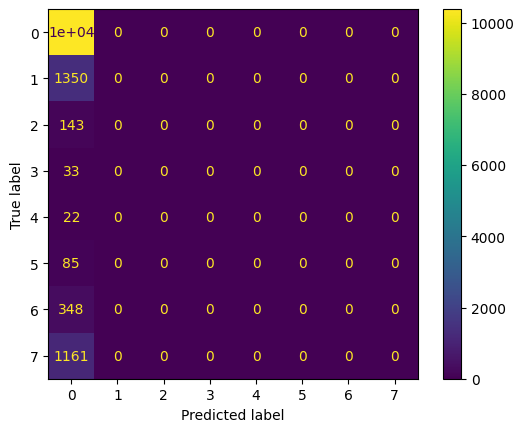

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Visualize the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation History')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

predictions = final_model.predict(x_test)
# Convert predictions to class labels
predicted_labels = predictions.argmax(axis=1)

# Compute various metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')
# Display the metrics in a table
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

print("Metrics Table:")
print(metrics_table)

# plot a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

class_labels = np.unique(y_test)

conf_matrix = confusion_matrix(y_test, predicted_labels, labels=class_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap='viridis')

# save the model, training, validation and testing datasets

In [ ]:
# save the model
final_model.save('final_model.h5')

# Merge features and labels for each dataset
train_data = x_train.copy()
train_data['status'] = y_train
val_data = x_val.copy()
val_data['status'] = y_val
test_data = x_test.copy()
test_data['status'] = y_test


# Save the DataFrame to CSV
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
